# **Evaluate Models on the Test Set**

In this notebook, the previously trained models (MobileNetV2, VGG16, ResNet50, and the proposed model) are evaluated on the test set. Their performance metrics are displayed and saved to a CSV file for later comparison and analysis.

In [1]:
from keras import models
from tools import load_images_with_labels, evaluate_model, save_metrics_to_csv

In [2]:
#Image dimensions for transfer learning models
width_tl = 224
height_tl = 224

#Image dimensions for the proposed model
width_pm = 540
height_pm = 960

#Path where test images are stored and organized by class
path_test = '../data/test_images/'

## MobileNetV2

In [3]:
#Load the trained MobileNetV2 model
mobileNetV2 = models.load_model('../models/mobilenetv2/mobilenetv2.keras')

In [4]:
#Load test images and their corresponding labels (using RGB channels)
X_test, y_test = load_images_with_labels(path=path_test, channels='bgr', width=width_tl, height=height_tl)
print(X_test.shape, y_test.shape)

(48, 224, 224, 3) (48,)


In [5]:
#MobileNetV2 specific preprocessing function (adjusts pixel values to the range expected by the model)
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

#Normalize test images using the same preprocessing applied during training
X_test_norm = preprocess_input(X_test.copy())

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 960ms/step


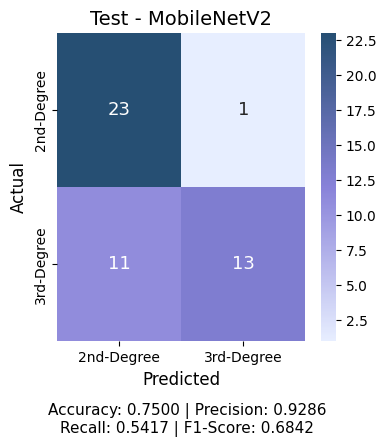

In [6]:
#Evaluation metrics on the test set
evaluate_model(mobileNetV2, X_test_norm, y_test, dataset='Test - MobileNetV2')

In [7]:
#Save the evaluation metrics in the CSV file
save_metrics_to_csv(mobileNetV2, X_test_norm, y_test, 'MobileNetV2', 'test', '../data/results/model_metrics.csv')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step


## VGG16

In [8]:
#Load the trained VGG16 model
vgg16 = models.load_model('../models/vgg16/vgg16.keras')

In [9]:
#Load test images and their corresponding labels (using RGB channels)
X_test, y_test = load_images_with_labels(path=path_test, channels='bgr', width=width_tl, height=height_tl)
print(X_test.shape, y_test.shape)

(48, 224, 224, 3) (48,)


In [10]:
#VGG16 specific preprocessing function (adjusts pixel values to the range expected by the model)
from tensorflow.keras.applications.vgg16 import preprocess_input

#Normalize test images using the same preprocessing applied during training
X_test_norm = preprocess_input(X_test.copy())

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


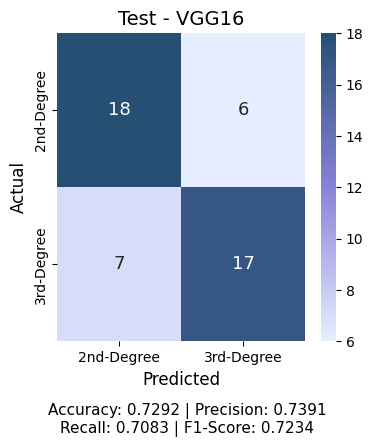

In [11]:
#Evaluation metrics on the test set
evaluate_model(vgg16, X_test_norm, y_test, dataset='Test - VGG16')

In [12]:
#Save the evaluation metrics in the CSV file
save_metrics_to_csv(vgg16, X_test_norm, y_test, 'VGG16', 'test', '../data/results/model_metrics.csv')

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


## ResNet50

In [13]:
#Load the trained ResNet50 model
resNet50 = models.load_model('../models/resnet50/resnet50.keras')

In [14]:
#Load test images and their corresponding labels (using RGB channels)
X_test, y_test = load_images_with_labels(path=path_test, channels='bgr', width=width_tl, height=height_tl)
print(X_test.shape, y_test.shape)

(48, 224, 224, 3) (48,)


In [15]:
#ResNet50 specific preprocessing function (adjusts pixel values to the range expected by the model)
from tensorflow.keras.applications.resnet50 import preprocess_input

#Normalize test images using the same preprocessing applied during training
X_test_norm = preprocess_input(X_test.copy())

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 896ms/step


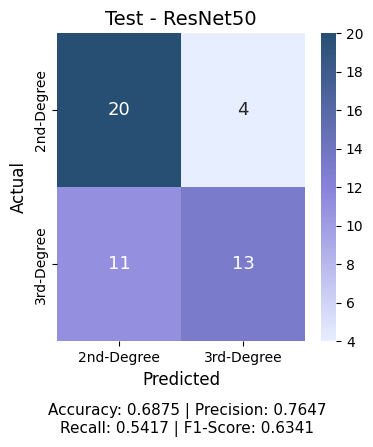

In [17]:
#Evaluation metrics on the test set
evaluate_model(resNet50, X_test_norm, y_test, dataset='Test - ResNet50')

In [18]:
#Save the evaluation metrics in the CSV file
save_metrics_to_csv(resNet50, X_test_norm, y_test, 'ResNet50', 'test', '../data/results/model_metrics.csv')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 924ms/step


## Proposed model

In [19]:
#Load the trained proposed CNN model
ourModel = models.load_model('../models/proposed_model/burn_green_cnn.keras')

In [20]:
#Load test images and their corresponding labels (using only the green channel)
X_test, y_test = load_images_with_labels(path=path_test, channels='green', width=width_pm, height=height_pm)
print(X_test.shape, y_test.shape)

(48, 960, 540, 1) (48,)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step


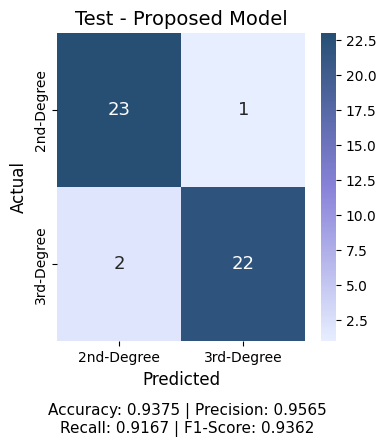

In [21]:
#Evaluation metrics on the test set
evaluate_model(ourModel, X_test, y_test, dataset='Test - Proposed Model')

In [22]:
#Save the evaluation metrics in the CSV file
save_metrics_to_csv(ourModel, X_test, y_test, 'OurModel', 'test', '../data/results/model_metrics.csv')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step
